In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/My Drive/Customer Personality/

/gdrive/My Drive/Customer Personality


In [ ]:
ls

marketing_campaign.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
sb.set()

In [ ]:
data=pd.read_csv("marketing_campaign.csv",sep = '\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data preprocessing

In [ ]:
def unique_columns(data):
    for i in _data.columns: 
        print(i, ':', len(_data[i].unique()))

In [ ]:
#Removing null values
data = data.dropna()
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Removing Z Columns - because they contain constant variable and won't contribute to the analysis

In [ ]:
data = data.drop(['Z_CostContact'], axis = 1)
data = data.drop(['Z_Revenue'], axis = 1)

In [ ]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


Group Marrital Status

In [ ]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
data_ms = data.copy() 

In [ ]:
data_ms['Marital_Status'] = data_ms['Marital_Status'].map({'Single':0, 'Together':1, 'Married':1,
                                                           'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0})
data_ms['Marital_Status'].unique()

array([0, 1])

In [ ]:
data_ms['Marital_Status'].value_counts()

1    1430
0     786
Name: Marital_Status, dtype: int64

Grouping Education

In [ ]:
data_ms['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
data_ms['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
data_ed = data_ms.copy()

Mapping Education into groups

In [ ]:
data_ed['Education'] = data_ed['Education'].map({'Graduation':1, 'PhD':2, 'Master':2, 'Basic':0, '2n Cycle':0})
data_ed['Education'].value_counts()

1    1116
2     846
0     254
Name: Education, dtype: int64

In [ ]:
data_ed= data_ed.reset_index(drop=True)
data_dt = data_ed.copy()

Calculating Customers age

In [ ]:
data_dt['Dt_Customer'] = pd.to_datetime(data_dt['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
data_dt['Dt_Customer'][0].year

2012

In [ ]:
data_dt['Year_Birth'][0]

1957

In [ ]:
data_dt['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
int(data_dt['Dt_Customer'][10].year)

2012

In [ ]:
Age=[]

In [ ]:
print('As the Maximum value of customers joined year in 2014, So we shall assume that data was collected in 2014')

As the Maximum value of customers joined year in 2014, So we shall assume that data was collected in 2014


In [ ]:
for i in range(data_dt.shape[0]):
    a = int(2014) - data_dt['Year_Birth'][i]
    Age.append(a)

In [ ]:
data_dt['Age']=Age

In [ ]:
data_s = data_dt.copy()

Identifying Outliers and Data Distribution

In [ ]:
data_s['Income'].unique().max()

666666.0

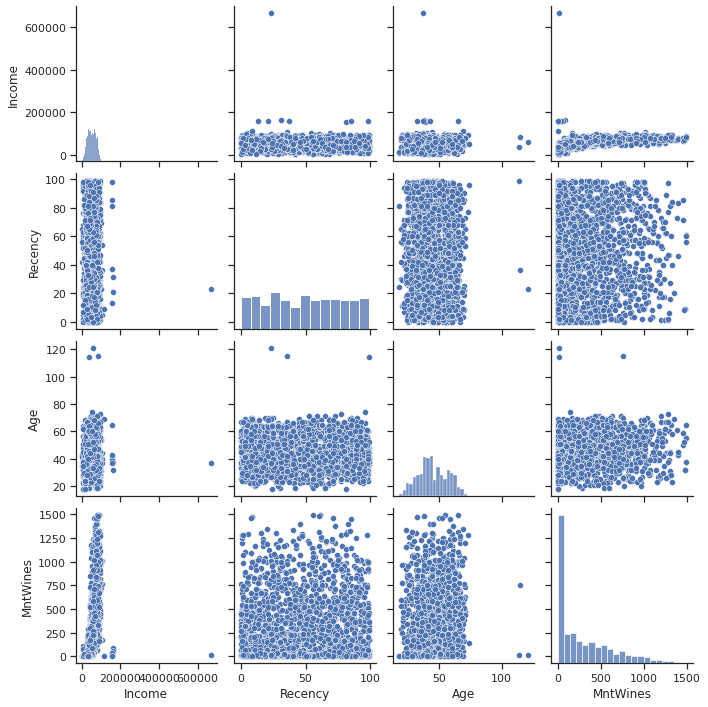

In [ ]:
sb.set(style="ticks", color_codes=True)
g = sb.pairplot(data_s, vars=["Income", "Recency", "Age", 'MntWines']) #, hue="Cluster")
plt.show()

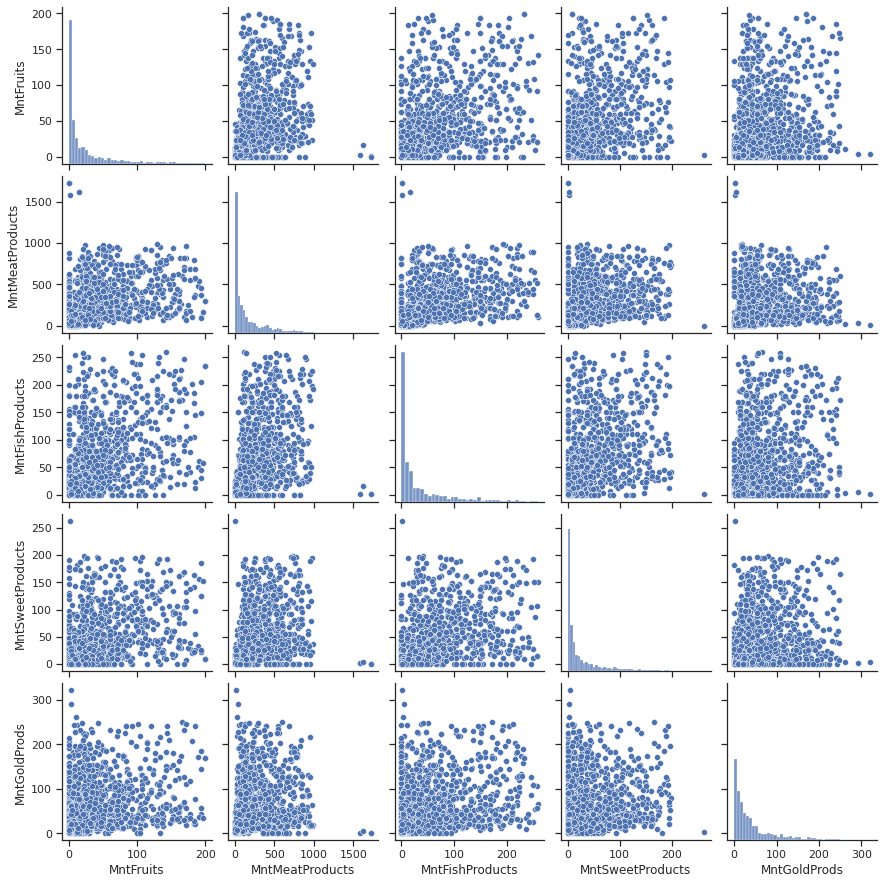

In [ ]:
sb.set(style="ticks", color_codes=True)
g = sb.pairplot(data_s, vars=['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'])
plt.show()

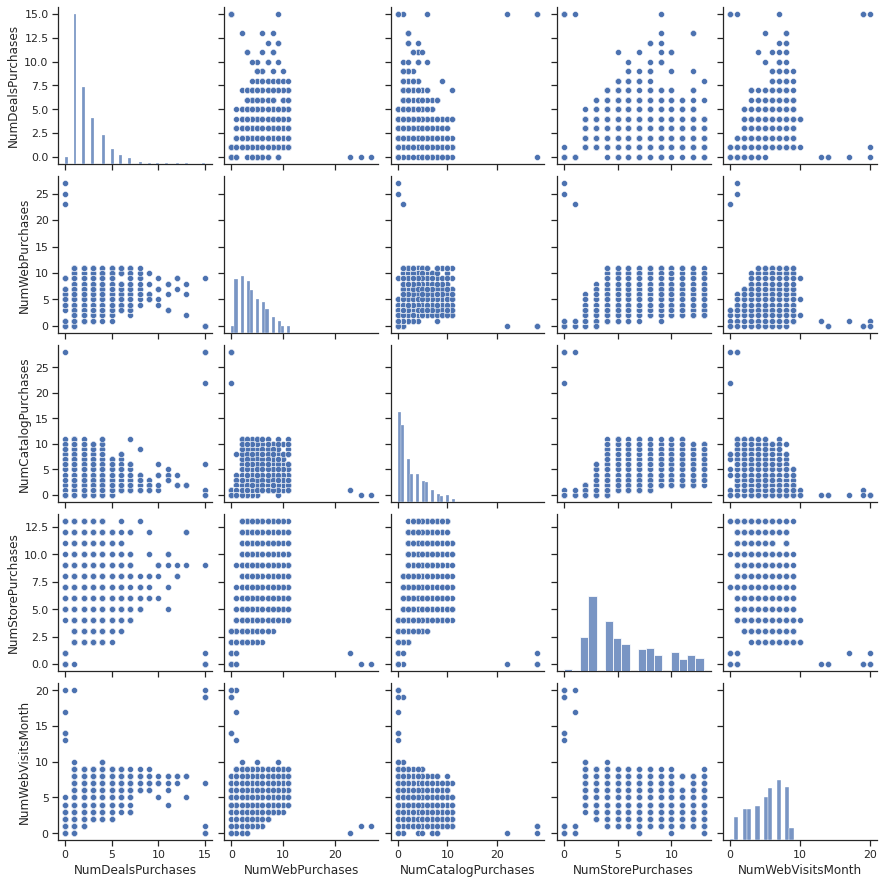

We will remove certain outliers that are prone to distorted the results


In [ ]:
sb.set(style="ticks", color_codes=True)
g = sb.pairplot(data_s, vars=['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'])
plt.show()
print('We will remove certain outliers that are prone to distorted the results')

Removing Outliers

We will remove following values
1. Ages greater than 100
2. Income greater than 60,000
3. MntMeatProducts greater than 1500
4. MntSweetProducts greater than 250
5. NumWebPurchases greater than 20
6. NumCatalogPurchases greater than 20

In [ ]:
data_s = data_s[data_s['Age'] < 100]
data_s = data_s[data_s['Income'] < 60000]
data_s = data_s[data_s['MntMeatProducts'] < 1500]
data_s = data_s[data_s['MntSweetProducts'] < 250]
data_s = data_s[data_s['MntGoldProds'] < 300]
data_s = data_s[data_s['NumWebPurchases'] < 20]
data_s = data_s[data_s['NumCatalogPurchases'] < 20]

In [ ]:
data_s = data_s.reset_index(drop=True)

In [ ]:
data_ags = data_s.copy()

In [ ]:
column_names_reordered = ['ID', 'Year_Birth','Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response']

In [ ]:
data_ag = data_ags[column_names_reordered]

In [ ]:
data_ags.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response', 'Age'], dtype=object)

In [ ]:
data_ag.head(5)

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,1,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,1,0,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,6182,1984,30,1,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
3,5324,1981,33,2,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
4,965,1971,43,1,0,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0


Grouping Kidhome, Teenhome, Spending and Purchases

In [ ]:
data_ag['Kids'] = data_ag['Kidhome'] + data_ag['Teenhome']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_ag['Total Spending'] = (data_ag['MntWines'] + data_ag['MntFruits'] + 
                             data_ag['MntMeatProducts'] + data_ag['MntFishProducts'] + 
                             data_ag['MntSweetProducts'] + data_ag['MntGoldProds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_ag['Total Purchases'] = (data_ag['NumDealsPurchases'] + data_ag['NumWebPurchases'] + 
                             data_ag['NumCatalogPurchases'] + data_ag['NumStorePurchases'] + 
                             data_ag['NumWebVisitsMonth'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_ag = data_ag.drop(['Kidhome', 'Teenhome', 'ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [ ]:
data_tp = data_ag.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'], axis=1)

Analysis from a Wider Prespective (Considering Total Spending and Total Purchases)

In [ ]:
data_tp.columns.values

array(['Age', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Total Spending',
       'Total Purchases'], dtype=object)

In [ ]:
columns_tp = ['Income', 'Recency', 'Total Spending', 'Total Purchases']

In [ ]:
columns_tp

['Income', 'Recency', 'Total Spending', 'Total Purchases']

In [ ]:
data_tbs = data_tp[columns_tp]
# scale the data for better results
x_scaled_tbs = preprocessing.scale(data_tbs)
x_scaled_tbs

array([[ 1.52718002,  0.31214897,  4.85806776,  2.10397331],
       [ 0.6155132 , -0.38445323, -0.73596908, -0.97618709],
       [-0.90712653, -0.80241455, -0.64449427, -0.53616417],
       ...,
       [-0.30612522,  1.1132415 , -0.7254143 , -0.97618709],
       [ 1.43774484,  1.4615426 ,  3.53520119,  1.07725318],
       [ 1.11989051, -0.31479301, -0.22582107,  0.05053304]])

From the graph we shall consider 4 clusters optimal number, as we try to minimize the WCSS values without losing interpetation meaning


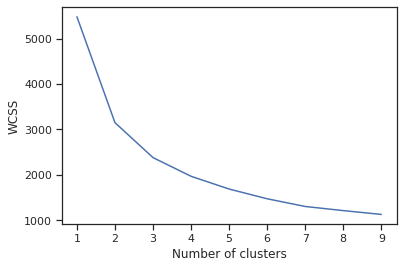

In [ ]:
# Createa an empty list
wcss =[]
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled_tbs)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)   
# Check the result
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print('From the graph we shall consider 4 clusters optimal number, as we try to minimize the WCSS values without losing interpetation meaning')

Modeling - KMeans

In [ ]:
kmeans_scaled_tbs = KMeans(4)
kmeans_scaled_tbs.fit(x_scaled_tbs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters_tbss = kmeans_scaled_tbs.fit_predict(x_scaled_tbs)
identified_clusters_tbss

array([2, 0, 1, ..., 3, 2, 0], dtype=int32)

In [ ]:
data_tbss_clusters = data_tp.copy()
data_tbss_clusters['Cluster'] = identified_clusters_tbss
data_tbss_clusters.head(6)

,Age,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Total Spending,Total Purchases,Cluster
0,57,1,0,58138.0,58,0,0,0,0,0,0,1,0,1617,32,2
1,60,1,0,46344.0,38,0,0,0,0,0,0,0,2,27,11,0
2,30,1,1,26646.0,26,0,0,0,0,0,0,0,1,53,14,1
3,33,2,1,58293.0,94,0,0,0,0,0,0,0,1,422,24,2
4,43,1,0,55635.0,34,0,0,0,0,0,0,0,1,590,27,2
5,29,2,1,33454.0,32,0,0,0,0,0,0,0,1,169,18,1


Model Evaluation

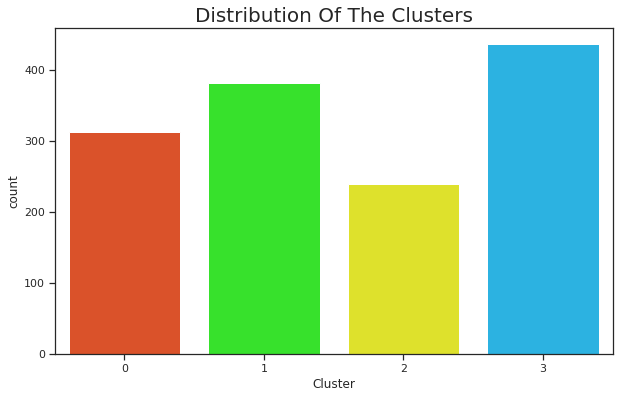

In [ ]:
plt.figure(figsize=(10,6))
Cl = sb.countplot(x = 'Cluster', data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
Cl.set_title("Distribution Of The Clusters", size = 20)
plt.show()

Customer Segmentation

<Figure size 432x288 with 0 Axes>

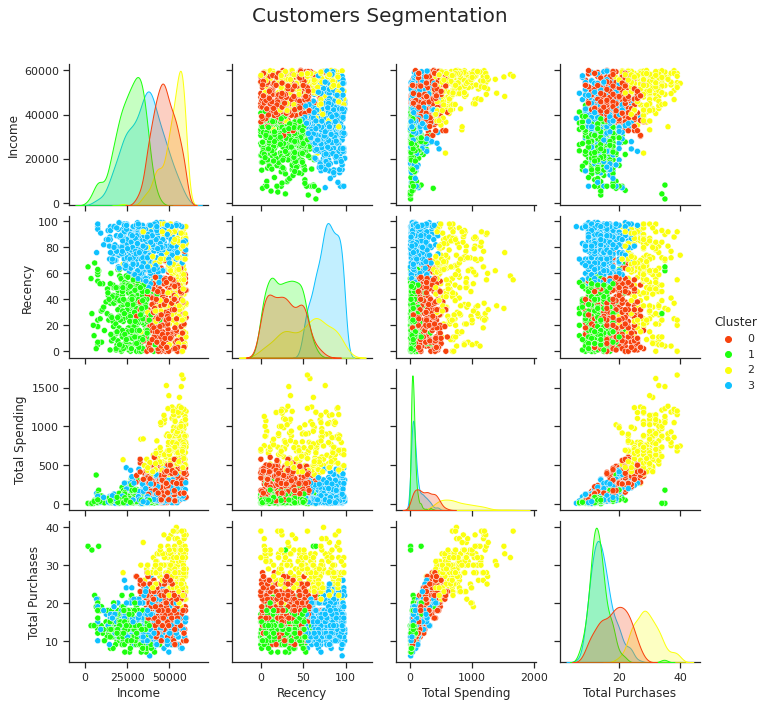

In [ ]:
Features = ['Income', 'Recency', 'Total Spending', 'Total Purchases', 'Cluster']
plt.figure()
sb.pairplot(data_tbss_clusters[Features], hue = "Cluster", palette=['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Customers Segmentation', size = 20)
plt.show()

In [ ]:
data_cs = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data_cs)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal


Clusters Distribution Along the Features

In [ ]:
data_tbss_clusters.columns.values

array(['Age', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Total Spending',
       'Total Purchases', 'Cluster'], dtype=object)

In [ ]:
grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'Marital_Status': 'sum', 'Age': 'sum', 'Kids': 'sum',
                                                        'Education': 'sum', 'Recency': 'sum',
                                                        'Income': 'sum','Total Spending':'sum', 'Total Purchases':'sum'}))
grouped

,Marital_Status,Age,Kids,Education,Recency,Income,Total Spending,Total Purchases
Cluster,,,,,,,,
0,200,14674,407,436,8985,14669715.0,76170,5761
1,249,15228,417,421,10786,10065084.0,22101,5130
2,152,11379,260,323,13157,12460150.0,179218,6945
3,288,18959,554,513,34254,15387382.0,46085,6352


In [ ]:
percents_df = grouped.apply(lambda x: round((x/x.sum()*100),2))
percents_df

,Marital_Status,Age,Kids,Education,Recency,Income,Total Spending,Total Purchases
Cluster,,,,,,,,
0,22.50,24.36,24.85,25.75,13.37,27.90,23.54,23.82
1,28.01,25.28,25.46,24.87,16.05,19.14,6.83,21.21
2,17.10,18.89,15.87,19.08,19.58,23.70,55.39,28.71
3,32.40,31.47,33.82,30.30,50.99,29.26,14.24,26.26


Text(0.5, 1.0, 'Distribution Of Clusters along the Features')

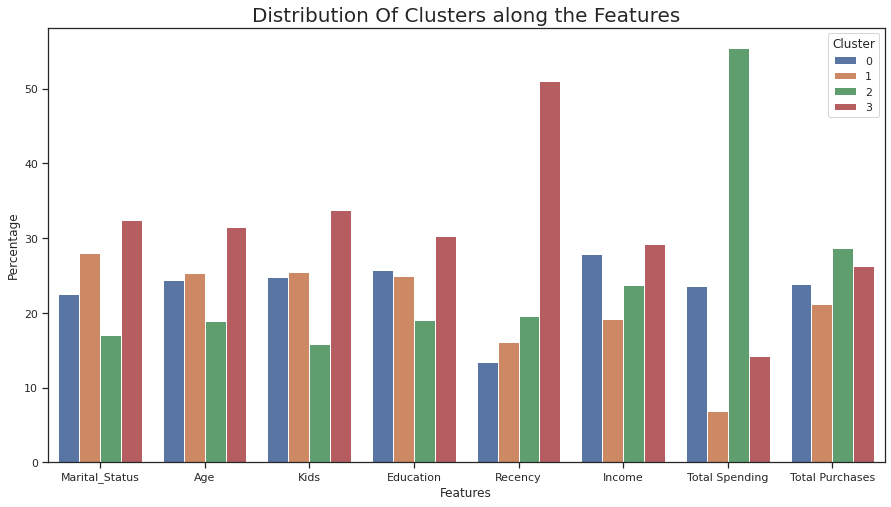

In [ ]:
plt.figure(figsize=(15,8))
s = sb.barplot(x = 'Features', y = 'Percentage', hue = 'Cluster',
            data = percents_df.stack().reset_index().rename(columns = {'level_1':'Features', 0: 'Percentage'}))
s.set_title("Distribution Of Clusters along the Features", size=20)

Clusters Distribution over Customers Interaction

Text(0.5, 1.0, "Customers' Response Segment")

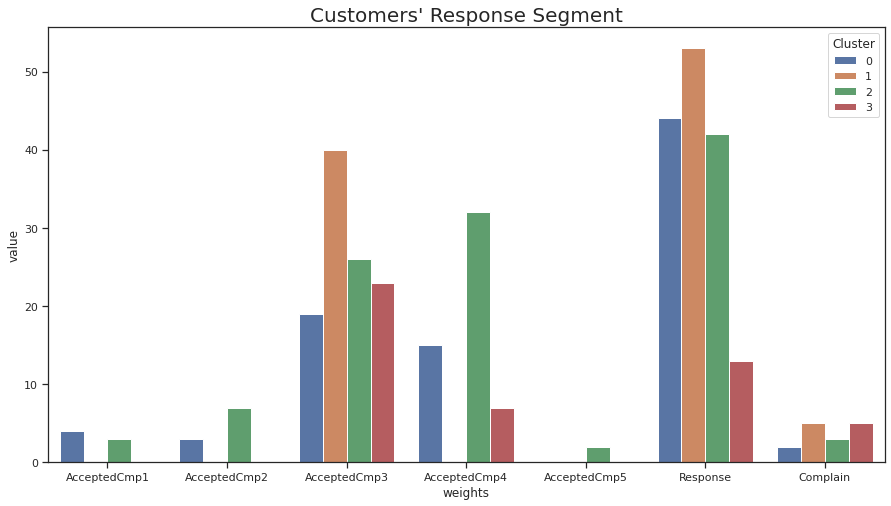

In [ ]:
plt.figure(figsize=(15,8))

grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                                                        'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                                                        'AcceptedCmp5': 'sum', 'Response': 'sum', 'Complain': 'sum'})
           .stack().reset_index().rename(columns = {'level_1':'weights', 0: 'value'}))

h = sb.barplot(x = 'weights', y = 'value', hue = 'Cluster', data = grouped)
h.set_title("Customers' Response Segment", size=20)

Result

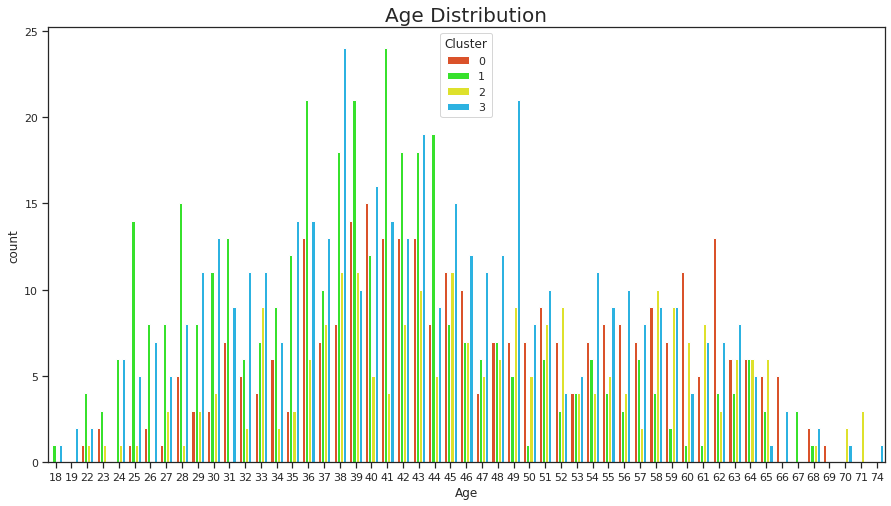

In [ ]:
plt.figure(figsize=(15,8))
pl = sb.countplot(x = 'Age', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
pl.set_title("Age Distribution", size=20)
plt.show()

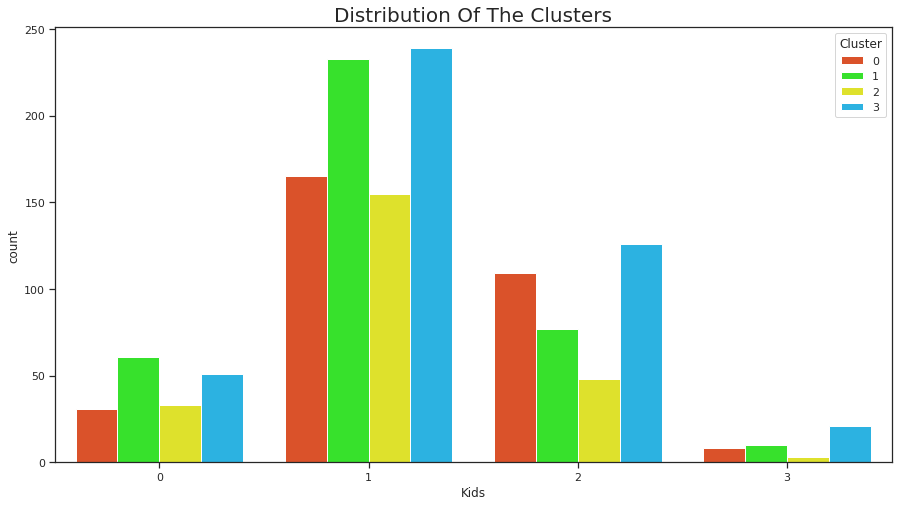

In [ ]:
plt.figure(figsize=(15,8))
pl = sb.countplot(x = 'Kids', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
pl.set_title("Distribution Of The Clusters", size=20)
plt.show()

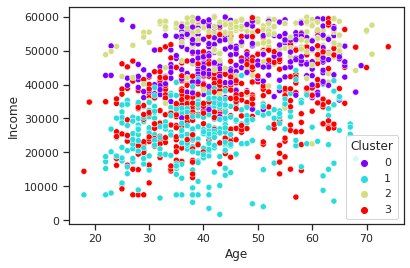

In [ ]:
sb.scatterplot(data = data_tbss_clusters, x = 'Age', y = 'Income', hue='Cluster', palette='rainbow') 

Text(0.5, 0.98, 'Customer Demographics')

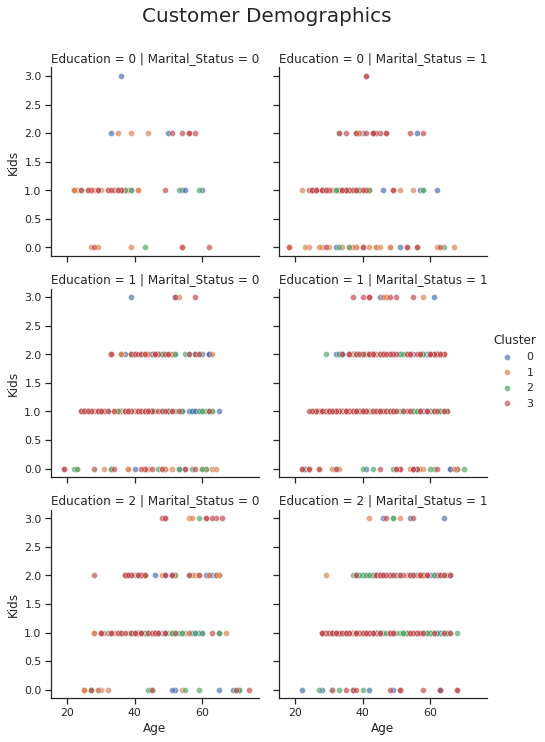

In [ ]:
g = sb.FacetGrid(data_tbss_clusters, col="Marital_Status", row="Education", hue="Cluster", height = 3.5, aspect= 1)
g.map(sb.scatterplot, "Age", "Kids", alpha=.7)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Customer Demographics', size=20)

In [ ]:
data_cs = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data_cs)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal
